In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
##获取数据，初步处理
file_data=pd.read_csv("./链家北京租房数据.csv")

In [18]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [19]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


In [20]:
file_data.shape

(8223, 5)

In [21]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


# 数据基本处理

In [22]:
##重复值和空值处理
file_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Length: 8223, dtype: bool

In [23]:
file_data=file_data.drop_duplicates()

In [24]:
file_data.shape

(5773, 5)

In [25]:
##检测是否有缺失值
file_data=file_data.dropna()
file_data.shape   #发现没有缺失值

(5773, 5)

# 数据类型转换

In [26]:
file_data.info

<bound method DataFrame.info of       区域        小区名称     户型     面积(㎡)  价格(元/月)
0     东城     万国城MOMA   1室0厅   59.11平米    10000
1     东城    北官厅胡同2号院   3室0厅   56.92平米     6000
2     东城       和平里三区   1室1厅   40.57平米     6900
3     东城        菊儿胡同   2室1厅   57.09平米     8000
4     东城  交道口北二条35号院   1室1厅   42.67平米     5500
...   ..         ...    ...       ...      ...
8218  顺义        怡馨家园   3室1厅  114.03平米     5500
8219  顺义      旭辉26街区  4房间2卫      59平米     5000
8220  顺义     前进花园玉兰苑   3室1厅   92.41平米     5800
8221  顺义        双裕小区   2室1厅   71.81平米     4200
8222  顺义       樱花园二区   1室1厅   35.43平米     2700

[5773 rows x 5 columns]>

In [27]:
data_new=np.array([])
data=file_data["面积(㎡)"].values
for i in data:
    data_new=np.append(data_new,np.array(i[:-2]))
data=data_new.astype(np.float64)
file_data.loc[:,"面积(㎡)"]=data

C:\Users\Dell\AppData\Local\Temp\ipykernel_24944\2828606342.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  file_data.loc[:,"面积(㎡)"]=data


In [28]:
housetype_data=file_data["户型"]
temp_list=[]
for i in housetype_data:
    temp_info=i.replace("房间","室")
    temp_list.append(temp_info)
file_data.loc[:,"户型"]=temp_list
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


# 图表分析

# 房源数量和位置分析

In [30]:
areas=file_data["区域"].unique()
new_df=pd.DataFrame({"区域":file_data["区域"].unique(),"数量":[0]*len(areas)})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [31]:
##通过 Pandas的 groupby()⽅法将 file data对象按照“区域”⼀列进⾏分组，并利⽤count()⽅法统计每个分组的数量

groupby_data=file_data.groupby(by="区域").count()

new_df["数量"]=groupby_data.values
new_df

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [32]:
groupby_data.info

<bound method DataFrame.info of        小区名称    户型  面积(㎡)  价格(元/月)
区域                               
东城      282   282    282      282
丰台      577   577    577      577
亦庄开发区   147   147    147      147
大兴      362   362    362      362
房山      180   180    180      180
昌平      347   347    347      347
朝阳     1597  1597   1597     1597
海淀      605   605    605      605
石景山     175   175    175      175
西城      442   442    442      442
通州      477   477    477      477
门头沟     285   285    285      285
顺义      297   297    297      297>

In [33]:
new_df.sort_values(by="数量",ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


# 户型数量分析

In [45]:
house_data=file_data["户型"]
house_data.head()

0    1室0厅
1    3室0厅
2    1室1厅
3    2室1厅
4    1室1厅
Name: 户型, dtype: object

In [60]:
def all_house(arr):
    key=np.unique(arr)
    result={}
    for k in key:
        mask=(arr==k)
        arr_new=arr[mask] #print(arr_new)
        v=arr_new.size
        result[k]=v
    return(result)
        
house_array=file_data["户型"]
house_info=all_house(house_array)
house_info

{'0室0厅': 1,
 '1室0卫': 10,
 '1室0厅': 244,
 '1室1卫': 126,
 '1室1厅': 844,
 '1室2厅': 13,
 '2室0卫': 1,
 '2室0厅': 23,
 '2室1卫': 120,
 '2室1厅': 2249,
 '2室2卫': 22,
 '2室2厅': 265,
 '2室3厅': 1,
 '3室0卫': 3,
 '3室0厅': 12,
 '3室1卫': 92,
 '3室1厅': 766,
 '3室2卫': 48,
 '3室2厅': 489,
 '3室3卫': 1,
 '3室3厅': 10,
 '4室1卫': 15,
 '4室1厅': 58,
 '4室2卫': 24,
 '4室2厅': 191,
 '4室3卫': 5,
 '4室3厅': 9,
 '4室5厅': 2,
 '5室0卫': 1,
 '5室0厅': 1,
 '5室1卫': 3,
 '5室1厅': 7,
 '5室2卫': 7,
 '5室2厅': 49,
 '5室3卫': 3,
 '5室3厅': 24,
 '5室4厅': 1,
 '5室5厅': 1,
 '6室0厅': 1,
 '6室1卫': 1,
 '6室1厅': 1,
 '6室2厅': 5,
 '6室3卫': 2,
 '6室3厅': 6,
 '6室4卫': 2,
 '7室1厅': 1,
 '7室2厅': 2,
 '7室3厅': 3,
 '7室4厅': 1,
 '8室4厅': 2,
 '9室1厅': 2,
 '9室2厅': 1,
 '9室5厅': 2}

In [61]:
house_type=dict((key,value) for key, value in house_info.items() if  value >50)
show_house=pd.DataFrame({'户型': [x for x in house_type.keys()],'数量':[x for x in house_type.values()]})
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
show_house


,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


<function matplotlib.pyplot.show(close=None, block=None)>

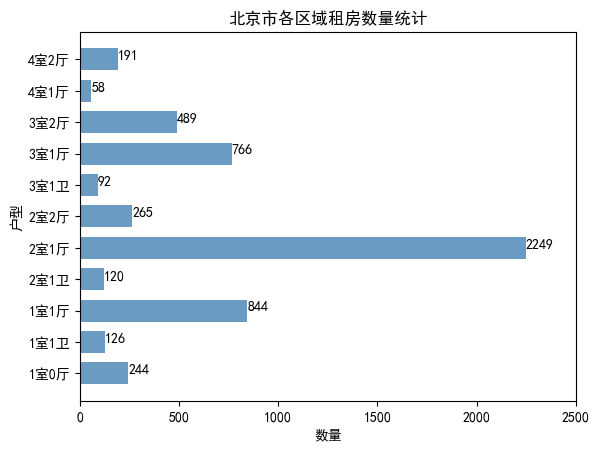

In [67]:
import matplotlib.pyplot as plt 
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
house_type=show_house["户型"]
house_type_num=show_house["数量"]
plt.barh(range(11),house_type_num,height=0.7,color="steelblue",alpha=0.8)
plt.yticks(range(11),house_type)
plt.xlim(0,2500)
plt.title("北京市各区域租房数量统计")
plt.xlabel("数量")
plt.ylabel("户型")

##给每个条上面添加数字
for x,y in enumerate(house_type_num):
    #print(x,y)
    plt.text(y,x,"%s" %y)
    
plt.show